# Lecture 5 - Exercise

## Code Header

- **Group ID**: 742
- **Members**: 
	- Lukas Bisgaard Kristensen
	- Mads Østergaard Dinesen
	- Máté Tallósi
	- Tudor-Razvan Tatar
- **Date**: 28/09/2022
- **Lecture**: 5 - “Clustering” 
- **Dependencies**: Jupyter Notebook, numpy=1.21.5, matplotlib=3.5.2, scipy=1.7.3, seaborn=0.11.2, pandas=1.4.3, scikit-learn=1.1.1
- **Python version**: 3.9+
- **Functionality**: TODO

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.mixture import GaussianMixture

%config InlineBackend.figure_format = 'png'
%config InlineBackend.rc = {'figure.figsize': (12, 12), 'savefig.dpi': 300, 'figure.autolayout': True}

## Mix the 2-dimensional data (training data only) by removing the labels

### Read the previously generated 2-dimensional data

In [2]:
selected_train_df = pd.read_csv('../Data/train_3_calasses.csv')
selected_train_df.head()

,1st_principal,2nd_principal,label
0,-1.503928,-0.073825,5.0
1,-0.479670,-2.547441,5.0
2,-1.365841,-2.715260,5.0
3,-2.560598,-2.574751,5.0
4,-0.881764,-2.520971,5.0


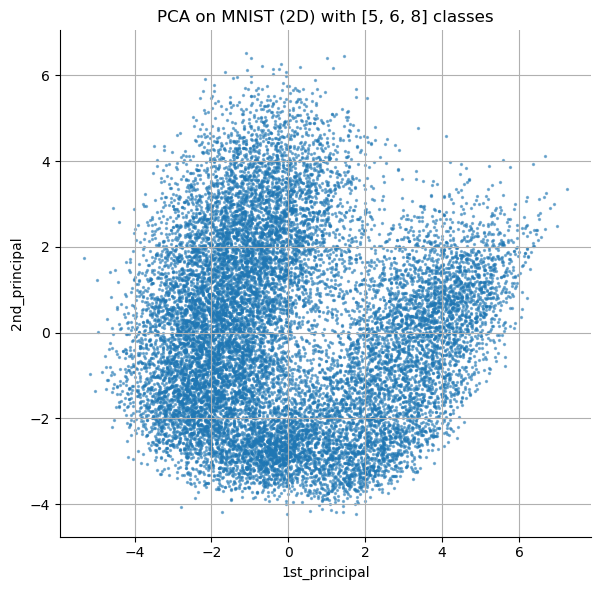

In [3]:
sns.FacetGrid(selected_train_df, height=6).map(plt.scatter, '1st_principal', '2nd_principal', s=2, alpha=0.5).add_legend()
plt.title(f'PCA on MNIST (2D) with [5, 6, 8] classes')
plt.grid()
plt.show()

## Fit Gaussian Mixture Model

In [4]:
gm = GaussianMixture(n_components=3)

gm.fit(selected_train_df[['1st_principal', '2nd_principal']].values)

y_pred = gm.predict(selected_train_df[['1st_principal', '2nd_principal']].values)

In [5]:
predicted_df = selected_train_df.copy()
predicted_df['label'] = y_pred

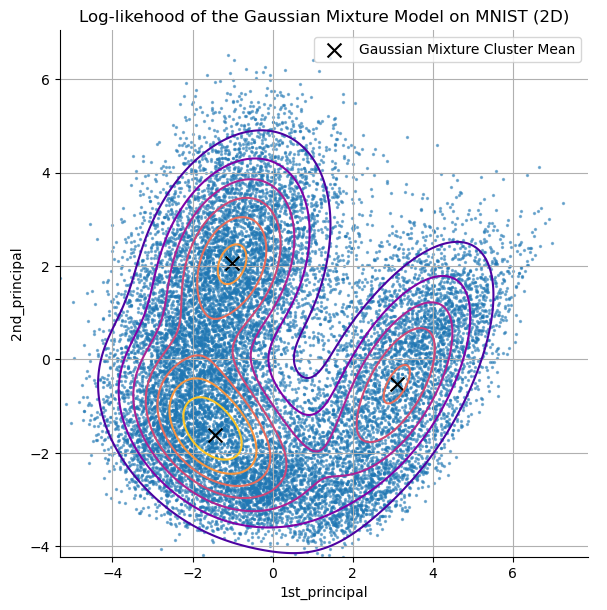

In [6]:
df = predicted_df

X = df[['1st_principal', '2nd_principal']].values

sns.FacetGrid(df, height=6).map(plt.scatter, '1st_principal', '2nd_principal', s=2, alpha=0.5).add_legend()

[x_min, y_min] = np.min(X, axis=0)
[x_max, y_max] = np.max(X, axis=0)
x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
pos = np.array([x.ravel(), y.ravel()]).T

plt.contour(x, y, np.exp(gm.score_samples(pos).reshape(x.shape)), cmap='plasma')

x_gm = plt.scatter(gm.means_[:, 0], gm.means_[:, 1], marker='x', s=100, c='black')

plt.legend([x_gm], ['Gaussian Mixture Cluster Mean'])
plt.title(f'Log-likehood of the Gaussian Mixture Model on MNIST (2D)')
plt.grid()
plt.show()

## Gaussian Mixture Model (clusters) vs Gaussian Model (classes)

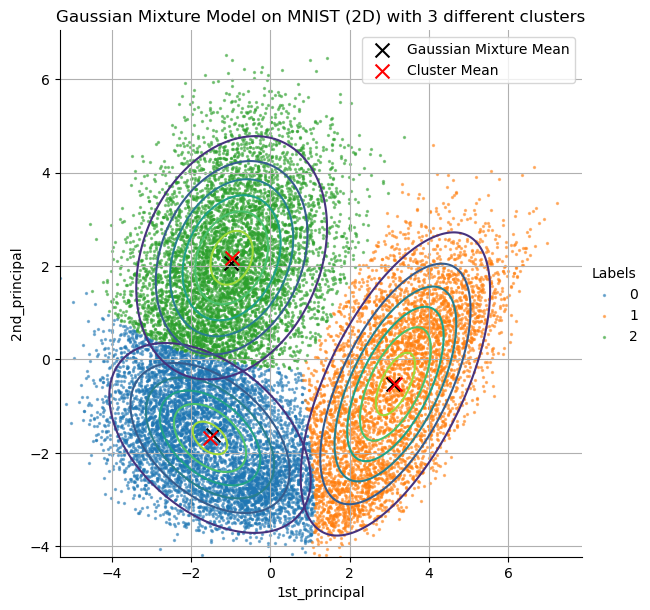

In [7]:
df = predicted_df

X = df[['1st_principal', '2nd_principal']].values
Y = df['label'].values

sns.FacetGrid(df, hue='label', height=6).map(plt.scatter, '1st_principal', '2nd_principal', s=2, alpha=0.5).add_legend(title='Labels')

x_gm = plt.scatter(gm.means_[:, 0], gm.means_[:, 1], marker='x', s=100, c='black')

[x_min, y_min] = np.min(X, axis=0)
[x_max, y_max] = np.max(X, axis=0)
x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
pos = np.dstack((x, y))

classes = np.unique(Y)
for c in classes:
    X_c = X[Y == c]
    pdf = sp.stats.multivariate_normal(mean=np.mean(X_c, axis=0), cov=np.cov(X_c.T)).pdf(pos)
    plt.contour(x, y, pdf)
    
    x_cluster = plt.scatter(np.mean(X_c, axis=0)[0], np.mean(X_c, axis=0)[1], marker='x', s=100, c='red')

plt.legend([x_gm, x_cluster], ['Gaussian Mixture Mean', 'Cluster Mean'])

plt.title(f'Gaussian Mixture Model on MNIST (2D) with 3 different clusters')
plt.grid()
plt.show()

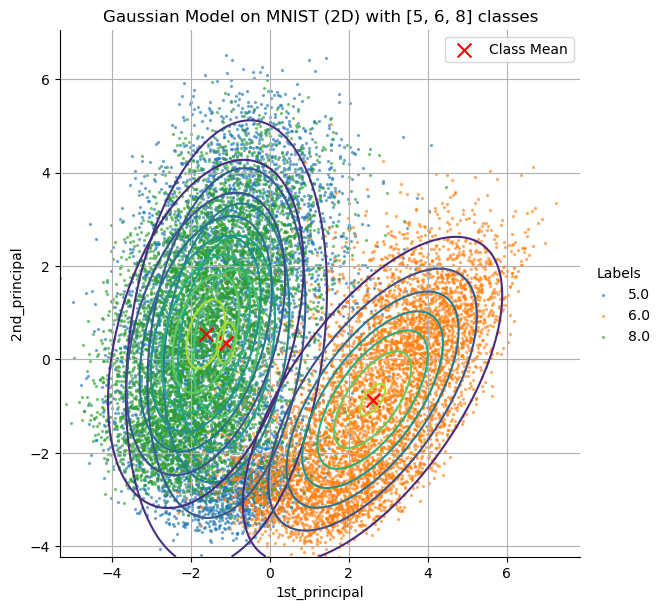

In [8]:
df = selected_train_df

X = df[['1st_principal', '2nd_principal']].values
Y = df['label'].values

sns.FacetGrid(df, hue='label', height=6).map(plt.scatter, '1st_principal', '2nd_principal', s=2, alpha=0.5).add_legend(title='Labels')

[x_min, y_min] = np.min(X, axis=0)
[x_max, y_max] = np.max(X, axis=0)
x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
pos = np.dstack((x, y))

classes = np.unique(Y)
for c in classes:
    X_c = X[Y == c]
    pdf = sp.stats.multivariate_normal(mean=np.mean(X_c, axis=0), cov=np.cov(X_c.T)).pdf(pos)
    plt.contour(x, y, pdf)
    
    x_cluster = plt.scatter(np.mean(X_c, axis=0)[0], np.mean(X_c, axis=0)[1], marker='x', s=100, c='red')

plt.legend([x_cluster], ['Class Mean'])

plt.title(f'Gaussian Model on MNIST (2D) with [5, 6, 8] classes')
plt.grid()
plt.show()